### Name: Ambreen Abdul Raheem
### Teacher: Sir Sajid Majeed
### Module: Deep Learning
### Course: Data Science With Artificial Intelligence
### Program: One Year Post Graduate Diploma (PGD)
### University: NED Academy
### Email: ambreen.upwork.27@gmail.com
### GitHub: https://github.com/ambreenraheem

### Using TensorFlow (Keras) to build, train, and evaluate a Convolutional Neural Network (CNN) for MNIST digit classification in Python.

### Step 1: Load and Visualize the MNIST Dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the dataset
mnist=tf.keras.datasets.mnist
# Load the training and test split of the mnist dataset
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


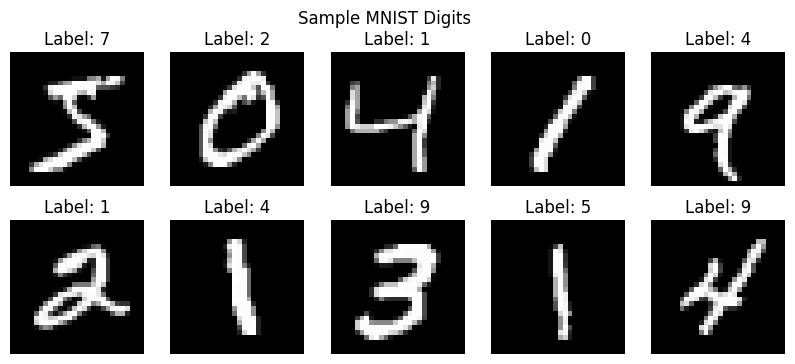

In [5]:
# Display sample images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(training_images[i], cmap='gray')
    plt.title(f"Label: {test_labels[i]}")
    plt.axis('off')
plt.suptitle("Sample MNIST Digits")
plt.show()

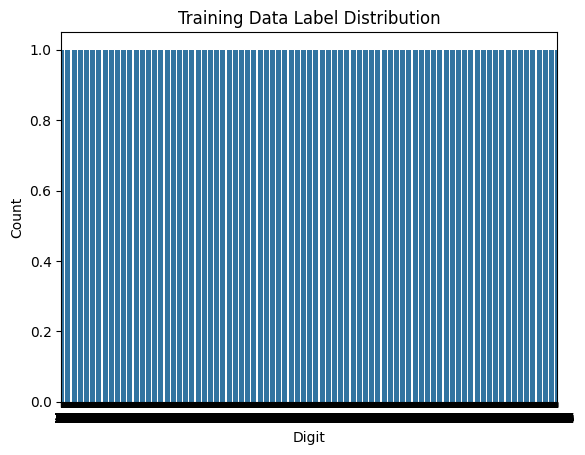

In [6]:
# Class distribution
sns.countplot(test_labels)
plt.title("Training Data Label Distribution")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

 ### Step 2: Preprocess Data

In [7]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [13]:
# Normalize images to range [0, 1]
training_images = training_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
# Reshape for CNN input
training_images = training_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [15]:
from tensorflow.keras.utils import to_categorical
training_labels = to_categorical(training_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [16]:
from sklearn.model_selection import train_test_split

# Split training data into 90% train and 10% validation
x_train, x_val, y_train, y_val = train_test_split(
    training_images, training_labels, test_size=0.1, random_state=42
)

### Step 3: Build CNN Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### Step 4: Train the Model

In [20]:
history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    epochs=10,
                    batch_size=32)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 57s 34ms/step - accuracy: 0.9593 - loss: 0.1348 - val_accuracy: 0.9868 - val_loss: 0.0452
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - accuracy: 0.9798 - loss: 0.0674 - val_accuracy: 0.9873 - val_loss: 0.0401
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9844 - loss: 0.0539 - val_accuracy: 0.9880 - val_loss: 0.0393
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9871 - loss: 0.0432 - val_accuracy: 0.9902 - val_loss: 0.0316
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 53s 31ms/step - accuracy: 0.9896 - loss: 0.0336 - val_accuracy: 0.9913 - val_loss: 0.0349
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9908 - loss: 0.0286 - val_accuracy: 0.9928 - val_loss: 0.0295
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9915 - loss: 0.0266 - val_accuracy: 0.9928 - val_loss: 0.0291
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.9923 -

### Step 5: Plot Learning Curves

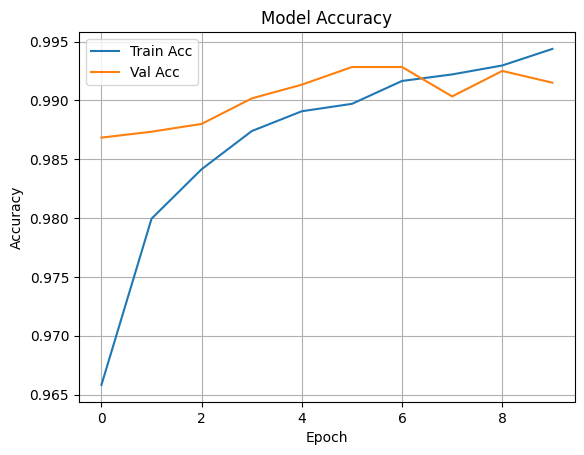

In [23]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

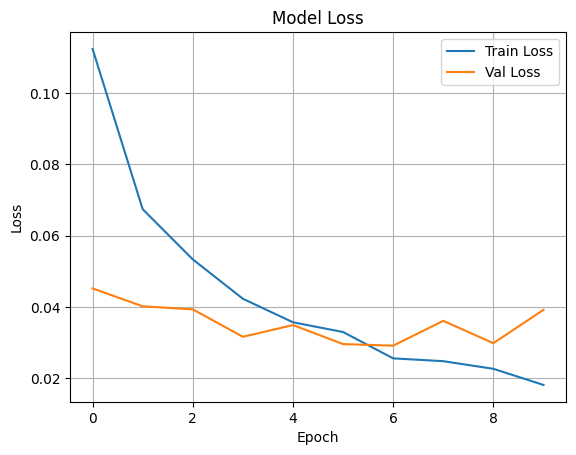

In [24]:
# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

### Step 6: Evaluate on Test Data

In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9905 - loss: 0.0377
Test Accuracy: 0.9913


### Step 7: Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


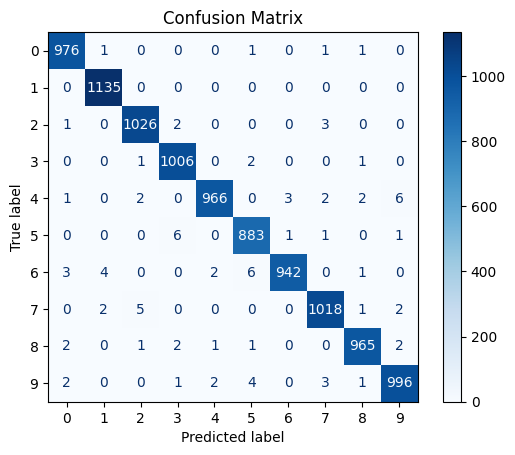

In [31]:
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()